# Digit Recognizer With TensorFlow

In [239]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, BatchNormalization, GlobalAvgPool2D, Dense

In [240]:
tf.config.run_functions_eagerly(True)

In [241]:
df_train = pd.read_csv("datasets/train.csv")
df_test = pd.read_csv("datasets/test.csv")

### Image: 28x28 -> 784 px + label

In [242]:
df_train.shape

(42000, 785)

In [243]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df_train.iloc[:, 1:]
y = df_train.iloc[:, 0]

In [245]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [246]:
X_train.shape

(33600, 784)

### Visualize Data

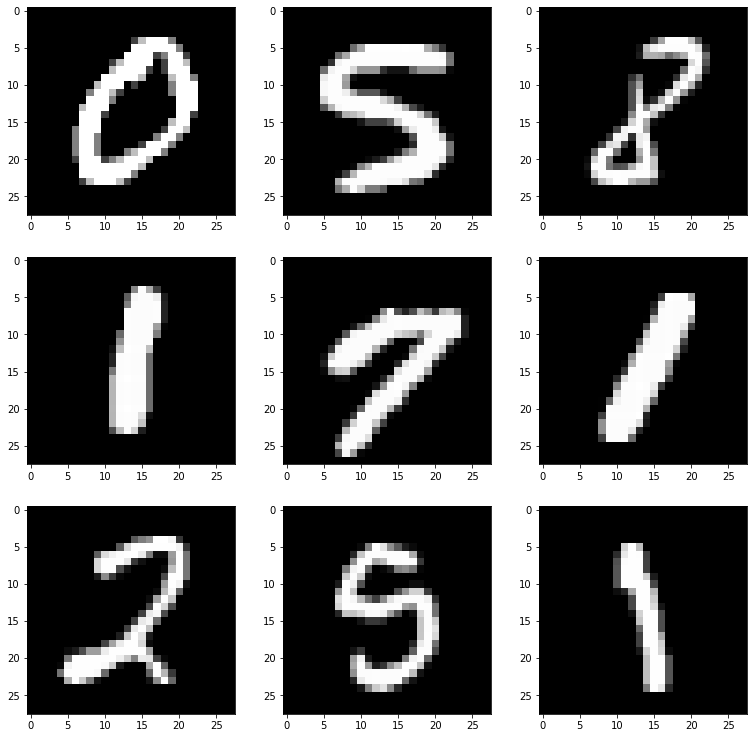

In [247]:
plt.figure(figsize=(13,13))
for i in range(9):
    j = np.random.randint(0, X_train.shape[0]-1)
    fig = np.array(X_train.iloc[j][:])
    TwoDim_fig = np.reshape(fig, (28, 28))
    
    plt.subplot(3, 3, i+1)
    plt.imshow(TwoDim_fig, cmap='gray')

plt.show()

### Normalize data

In [248]:
X_train = X_train / 255.0
X_test = X_test / 255.0
df_test = df_test / 255.0

In [249]:
X_train.shape

(33600, 784)

### 1D To 2D Images

In [250]:
X_train = np.reshape(np.array(X_train), (X_train.shape[0], 28, 28))
X_test = np.reshape(np.array(X_test), (X_test.shape[0], 28, 28))
df_test = np.reshape(np.array(df_test), (df_test.shape[0], 28, 28))

X_train.shape, X_test.shape, df_test.shape

((33600, 28, 28), (8400, 28, 28), (28000, 28, 28))

### Model

In [251]:
def create_model():
    #Shape of input
    input_ = Input(shape=(28, 28, 1))
    #2D convolution layer
    c = Conv2D(filters=32, kernel_size=(3,3), activation="relu")(input_)
    c = Conv2D(filters=64, kernel_size=(3,3), activation="relu")(c)
    c = MaxPool2D()(c)
    c = BatchNormalization()(c)
    
    c = Conv2D(filters=128, kernel_size=(3,3), activation="relu")(c)
    c = MaxPool2D()(c)
    c = BatchNormalization()(c)
    
    c = GlobalAvgPool2D()(c)
    c = Dense(64, activation="relu")(c)
    c = Dense(10, activation="softmax")(c)
    
    model = tf.keras.Model(inputs=input_, outputs=c)
    
    return model

In [252]:
model = create_model()

### Compile model

In [253]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

### Training model

In [254]:
model.fit(X_train, y_train, batch_size=64, epochs=3, validation_split=0.2)

C:\Users\Usuario\anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


Epoch 1/3
420/420 [==============================] - 59s 139ms/step - loss: 0.3373 - accuracy: 0.9109 - val_loss: 3.8891 - val_accuracy: 0.1857
Epoch 2/3
420/420 [==============================] - 56s 133ms/step - loss: 0.0740 - accuracy: 0.9775 - val_loss: 0.1054 - val_accuracy: 0.9685
Epoch 3/3
420/420 [==============================] - 55s 131ms/step - loss: 0.0456 - accuracy: 0.9868 - val_loss: 0.1386 - val_accuracy: 0.9561


### Evaluate model

In [255]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print("Loss: ",test_loss)
print("Acc: ", test_acc)

132/132 [==============================] - 5s 38ms/step - loss: 0.1341 - accuracy: 0.9592
Loss:  0.13410766422748566
Acc:  0.9591666460037231


### Generate submission

In [256]:
sample_sub = pd.read_csv("datasets/sample_submission.csv")

sample_sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [262]:
pred_test = model.predict(df_test)

### Visualize one prediction

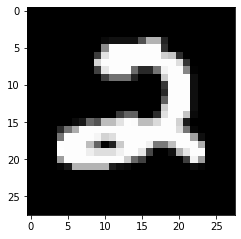

In [263]:
plt.figure(figsize=(13,13))
fig = df_test[0]
    
plt.subplot(3, 3, 1)
plt.imshow(fig, cmap='gray')

plt.show()

In [264]:
pred_test[0]

array([6.5949685e-06, 5.5449595e-07, 9.9996793e-01, 2.4559345e-06,
       1.1347227e-05, 1.9322982e-07, 1.5456537e-06, 2.0004459e-06,
       2.4210499e-06, 4.8020152e-06], dtype=float32)

### Generate 1D array selecting the highest probability

In [265]:
res = []
for i in range(pred_test.shape[0]):
    max = pred_test[i][0]
    ind = 0
    for j in range(1, pred_test.shape[1], 1):
        if pred_test[i][j] > max:
            max = pred_test[i][j]
            ind = j
    res.append(ind)

In [266]:
sub = pd.DataFrame({"ImageId": sample_sub["ImageId"], "Label": res})

sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [268]:
sub.to_csv('submission.csv', index=False)

# Kaggle score: 0.95610